# Загрузка Pandas и очистка данных

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import re

In [2]:
df = pd.read_csv('main_task.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Restaurant_id      40000 non-null  object 
 1   City               40000 non-null  object 
 2   Cuisine Style      30717 non-null  object 
 3   Ranking            40000 non-null  float64
 4   Rating             40000 non-null  float64
 5   Price Range        26114 non-null  object 
 6   Number of Reviews  37457 non-null  float64
 7   Reviews            40000 non-null  object 
 8   URL_TA             40000 non-null  object 
 9   ID_TA              40000 non-null  object 
dtypes: float64(3), object(7)
memory usage: 3.1+ MB


- `Restaurant_id` — идентификационный номер ресторана / сети ресторанов;
- `City` — город, в котором находится ресторан;
- `Cuisine Style` — кухня или кухни, к которым можно отнести блюда, предлагаемые в ресторане;
- `Ranking` — место, которое занимает данный ресторан среди всех ресторанов своего города;
- `Rating` — рейтинг ресторана по данным TripAdvisor (именно это значение должна будет предсказывать модель);
- `Price Range` — диапазон цен в ресторане;
- `Number of Reviews` — количество отзывов о ресторане;
- `Reviews` — данные о двух отзывах, которые отображаются на сайте ресторана;
- `URL_TA` — URL страницы ресторана на TripAdvosor;
- `ID_TA` — идентификатор ресторана в базе данных TripAdvisor.

In [4]:
df

,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
0,id_5569,Paris,"['European', 'French', 'International']",5570.0,3.5,$$ - $$$,194.0,"[['Good food at your doorstep', 'A good hotel ...",/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643
1,id_1535,Stockholm,NaN,1537.0,4.0,NaN,10.0,"[['Unique cuisine', 'Delicious Nepalese food']...",/Restaurant_Review-g189852-d7992032-Reviews-Bu...,d7992032
2,id_352,London,"['Japanese', 'Sushi', 'Asian', 'Grill', 'Veget...",353.0,4.5,$$$$,688.0,"[['Catch up with friends', 'Not exceptional'],...",/Restaurant_Review-g186338-d8632781-Reviews-RO...,d8632781
3,id_3456,Berlin,NaN,3458.0,5.0,NaN,3.0,"[[], []]",/Restaurant_Review-g187323-d1358776-Reviews-Es...,d1358776
4,id_615,Munich,"['German', 'Central European', 'Vegetarian Fri...",621.0,4.0,$$ - $$$,84.0,"[['Best place to try a Bavarian food', 'Nice b...",/Restaurant_Review-g187309-d6864963-Reviews-Au...,d6864963
...,...,...,...,...,...,...,...,...,...,...
39995,id_499,Milan,"['Italian', 'Vegetarian Friendly', 'Vegan Opti...",500.0,4.5,$$ - $$$,79.0,"[['The real Italian experience!', 'Wonderful f...",/Restaurant_Review-g187849-d2104414-Reviews-Ro...,d2104414
39996,id_6340,Paris,"['French', 'American', 'Bar', 'European', 'Veg...",6341.0,3.5,$$ - $$$,542.0,"[['Parisian atmosphere', 'Bit pricey but inter...",/Restaurant_Review-g187147-d1800036-Reviews-La...,d1800036
39997,id_1649,Stockholm,"['Japanese', 'Sushi']",1652.0,4.5,NaN,4.0,"[['Good by swedish standards', 'A hidden jewel...",/Restaurant_Review-g189852-d947615-Reviews-Sus...,d947615
39998,id_640,Warsaw,"['Polish', 'European', 'Eastern European', 'Ce...",641.0,4.0,$$ - $$$,70.0,"[['Underground restaurant', 'Oldest Restaurant...",/Restaurant_Review-g274856-d1100838-Reviews-Ho...,d1100838


## Ranking
---

*Пустых значений нет*

In [5]:
df['Ranking'].value_counts()

1080.0     19
437.0      18
491.0      18
345.0      18
431.0      18
           ..
14711.0     1
9409.0      1
14109.0     1
10501.0     1
5699.0      1
Name: Ranking, Length: 11936, dtype: int64

## Price Range
---
*Около 14000 пустых значений. Большая часть из непустых - средний ценовой сегмент*

*?value_counts работает некорректно с этим столбцом?*

*Заполнила пропуски самым распространенным средним сегментом, добавила столбец Price Segment со значениями 1 2 или 3*

In [6]:
df['Price Range'].unique()

array(['$$ - $$$', nan, '$$$$', '$'], dtype=object)

In [7]:
(df[df['Price Range'] == '$$ - $$$']['Restaurant_id'].count()) 

18412

In [8]:
(df[df['Price Range'] == '$']['Restaurant_id'].count())

6279

In [9]:
(df[df['Price Range'] == '$$$$']['Restaurant_id'].count())

1423

In [10]:
df['Price Segment'] = df['Price Range']
df.loc[(df['Price Range'] == '$'), 'Price Segment'] = 1
df.loc[(df['Price Range'] == '$$ - $$$'), 'Price Segment'] = 2
df.loc[(df['Price Range'] == '$$$$'), 'Price Segment'] = 3
df['Price Segment'] = df['Price Segment'].fillna(2)

In [11]:
df['Price Segment'] = df['Price Segment'].astype(float)

## City
---
*Все города названы правильно, значения не повторяются, пустых нет. Число уникальных значений - 31*

*Добавление dummy-переменных существенно повысило качество модели, поэтому я их оставила*

In [12]:
df['City'].value_counts()

London        5757
Paris         4897
Madrid        3108
Barcelona     2734
Berlin        2155
Milan         2133
Rome          2078
Prague        1443
Lisbon        1300
Vienna        1166
Amsterdam     1086
Brussels      1060
Hamburg        949
Munich         893
Lyon           892
Stockholm      820
Budapest       816
Warsaw         727
Dublin         673
Copenhagen     659
Athens         628
Edinburgh      596
Zurich         538
Oporto         513
Geneva         481
Krakow         443
Oslo           385
Helsinki       376
Bratislava     301
Luxembourg     210
Ljubljana      183
Name: City, dtype: int64

In [13]:
len(df['City'].value_counts())

31

In [14]:
df['City'][22077]

'Prague'

#### Тест MAE с dummy cities - 0.417 стало 0.212 

In [15]:
df = df.join(pd.get_dummies(df['City'].apply(pd.Series).stack()).sum(level=0))

## Country 
---

*Попробую создать новый признак - страну и посмотреть как dummies повлияют на модель*

*Получилось 22 страны*

*Dummy contries улучшили модель, но не так сильно, как cities*

In [16]:
df.loc[((df['City'] == 'Milan') | (df['City'] == 'Rome')), 'Country'] = 'Italy'
df.loc[((df['City'] == 'London') | (df['City'] == 'Edinburgh')), 'Country'] = 'UK'
df.loc[((df['City'] == 'Madrid') | (df['City'] == 'Barcelona')), 'Country'] = 'Spain'
df.loc[((df['City'] == 'Berlin') | (df['City'] == 'Hamburg') | (df['City'] == 'Munich')), 'Country'] = 'Germany'
df.loc[(df['City'] == 'Prague'), 'Country'] = 'Czech'
df.loc[((df['City'] == 'Lisbon') |  (df['City'] == 'Oporto')), 'Country'] = 'Portugal'
df.loc[(df['City'] == 'Vienna'), 'Country'] = 'Austria'
df.loc[(df['City'] == 'Amsterdam'), 'Country'] = 'Netherlands'
df.loc[(df['City'] == 'Brussels'), 'Country'] = 'Belgium'
df.loc[(df['City'] == 'Stockholm'), 'Country'] = 'Sweden'
df.loc[((df['City'] == 'Lyon') |  (df['City'] == 'Paris')), 'Country'] = 'France'
df.loc[(df['City'] == 'Budapest'), 'Country'] = 'Hungary'
df.loc[((df['City'] == 'Warsaw') |  (df['City'] == 'Krakow')), 'Country'] = 'Poland'
df.loc[(df['City'] == 'Dublin'), 'Country'] = 'Ireland'
df.loc[(df['City'] == 'Copenhagen'), 'Country'] = 'Denmark'
df.loc[(df['City'] == 'Athens'), 'Country'] = 'Greece'
df.loc[((df['City'] == 'Zurich') |  (df['City'] == 'Geneva')), 'Country'] = 'Switzerland'
df.loc[(df['City'] == 'Copenhagen'), 'Country'] = 'Denmark'
df.loc[(df['City'] == 'Oslo'), 'Country'] = 'Norway'
df.loc[(df['City'] == 'Helsinki'), 'Country'] = 'Finland'
df.loc[(df['City'] == 'Bratislava'), 'Country'] = 'Slovakia'
df.loc[(df['City'] == 'Luxembourg'), 'Country'] = 'Luxembourg'
df.loc[(df['City'] == 'Ljubljana'), 'Country'] = 'Slovenia'

In [17]:
len(df['Country'].unique())

22

#### Тест MAE с dummy cities - 0.417 стало 0.242 (хуже чем cities)

In [18]:
# df = df.join(pd.get_dummies(df['Country'].apply(pd.Series).stack()).sum(level=0))

## Cuisine Style
---
*Типов кухонь - 126. Самая частовстречающаяся - Vegetarian Friendly. Пустых значений - около 9000*

*Dummy кухни особо не поменяли качество модели, поэтому не стала нагружать датасет*

In [19]:
df['Cuisine Style'][2]

"['Japanese', 'Sushi', 'Asian', 'Grill', 'Vegetarian Friendly', 'Vegan Options', 'Gluten Free Options']"

In [20]:
full_cuisine = df['Cuisine Style'].dropna()

In [21]:
# Заполнила пропуски самой типичной кухней 
df['Cuisine Style'] = df['Cuisine Style'].fillna('European')

In [22]:
# df['Cuisine Style'] = df['Cuisine Style'].str.findall('\w+\s*\w*\s*\w*')
df['Cuisine Style'] = df['Cuisine Style'].str.findall('\'(.*?)\'')

In [23]:
df['Cuisine Style']

0                        [European, French, International]
1                                                       []
2        [Japanese, Sushi, Asian, Grill, Vegetarian Fri...
3                                                       []
4          [German, Central European, Vegetarian Friendly]
                               ...                        
39995    [Italian, Vegetarian Friendly, Vegan Options, ...
39996    [French, American, Bar, European, Vegetarian F...
39997                                    [Japanese, Sushi]
39998    [Polish, European, Eastern European, Central E...
39999                                            [Spanish]
Name: Cuisine Style, Length: 40000, dtype: object

In [24]:
cuisines = set()
for row in df['Cuisine Style']:
    for cuisine in row:
        cuisines.add(cuisine)
len(cuisines)

125

In [25]:
cuisines

{'Afghani',
 'African',
 'Albanian',
 'American',
 'Arabic',
 'Argentinean',
 'Armenian',
 'Asian',
 'Australian',
 'Austrian',
 'Azerbaijani',
 'Balti',
 'Bangladeshi',
 'Bar',
 'Barbecue',
 'Belgian',
 'Brazilian',
 'Brew Pub',
 'British',
 'Burmese',
 'Cafe',
 'Cajun & Creole',
 'Cambodian',
 'Canadian',
 'Caribbean',
 'Caucasian',
 'Central American',
 'Central Asian',
 'Central European',
 'Chilean',
 'Chinese',
 'Colombian',
 'Contemporary',
 'Croatian',
 'Cuban',
 'Czech',
 'Danish',
 'Delicatessen',
 'Diner',
 'Dutch',
 'Eastern European',
 'Ecuadorean',
 'Egyptian',
 'Ethiopian',
 'European',
 'Fast Food',
 'Filipino',
 'French',
 'Fujian',
 'Fusion',
 'Gastropub',
 'Georgian',
 'German',
 'Gluten Free Options',
 'Greek',
 'Grill',
 'Halal',
 'Hawaiian',
 'Healthy',
 'Hungarian',
 'Indian',
 'Indonesian',
 'International',
 'Irish',
 'Israeli',
 'Italian',
 'Jamaican',
 'Japanese',
 'Korean',
 'Kosher',
 'Latin',
 'Latvian',
 'Lebanese',
 'Malaysian',
 'Mediterranean',
 'Mexic

In [26]:
cuisines_df = pd.DataFrame([[cuisine, full_cuisine[full_cuisine.str.contains(cuisine)].count()] 
                               for cuisine in cuisines],
                        columns = ['cuisine', 'amount'])
cuisines_df.query('amount == amount.max()')

,cuisine,amount
87,Vegetarian Friendly,11189


In [27]:
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()
styles = pd.DataFrame(mlb.fit_transform(df['Cuisine Style']),columns=mlb.classes_, index=df.index)

In [28]:
styles

,Afghani,African,Albanian,American,Arabic,Argentinean,Armenian,Asian,Australian,Austrian,...,Ukrainian,Uzbek,Vegan Options,Vegetarian Friendly,Venezuelan,Vietnamese,Welsh,Wine Bar,Xinjiang,Yunnan
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,...,0,0,1,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,0,0,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,0
39996,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
39997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
39998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [29]:
df['Cuisines Number'] = styles.sum(axis=1)
df.loc[(df['Cuisines Number'] == 0, 'Cuisines Number')] = 1
df['Cuisines Number'] = df['Cuisines Number'].astype(float)
df

,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,...,Oslo,Paris,Prague,Rome,Stockholm,Vienna,Warsaw,Zurich,Country,Cuisines Number
0,id_5569,Paris,"[European, French, International]",5570.0,3.5,$$ - $$$,194.0,"[['Good food at your doorstep', 'A good hotel ...",/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643,...,0,1,0,0,0,0,0,0,France,3.0
1,id_1535,Stockholm,[],1537.0,4.0,NaN,10.0,"[['Unique cuisine', 'Delicious Nepalese food']...",/Restaurant_Review-g189852-d7992032-Reviews-Bu...,d7992032,...,0,0,0,0,1,0,0,0,Sweden,1.0
2,id_352,London,"[Japanese, Sushi, Asian, Grill, Vegetarian Fri...",353.0,4.5,$$$$,688.0,"[['Catch up with friends', 'Not exceptional'],...",/Restaurant_Review-g186338-d8632781-Reviews-RO...,d8632781,...,0,0,0,0,0,0,0,0,UK,7.0
3,id_3456,Berlin,[],3458.0,5.0,NaN,3.0,"[[], []]",/Restaurant_Review-g187323-d1358776-Reviews-Es...,d1358776,...,0,0,0,0,0,0,0,0,Germany,1.0
4,id_615,Munich,"[German, Central European, Vegetarian Friendly]",621.0,4.0,$$ - $$$,84.0,"[['Best place to try a Bavarian food', 'Nice b...",/Restaurant_Review-g187309-d6864963-Reviews-Au...,d6864963,...,0,0,0,0,0,0,0,0,Germany,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,id_499,Milan,"[Italian, Vegetarian Friendly, Vegan Options, ...",500.0,4.5,$$ - $$$,79.0,"[['The real Italian experience!', 'Wonderful f...",/Restaurant_Review-g187849-d2104414-Reviews-Ro...,d2104414,...,0,0,0,0,0,0,0,0,Italy,4.0
39996,id_6340,Paris,"[French, American, Bar, European, Vegetarian F...",6341.0,3.5,$$ - $$$,542.0,"[['Parisian atmosphere', 'Bit pricey but inter...",/Restaurant_Review-g187147-d1800036-Reviews-La...,d1800036,...,0,1,0,0,0,0,0,0,France,5.0
39997,id_1649,Stockholm,"[Japanese, Sushi]",1652.0,4.5,NaN,4.0,"[['Good by swedish standards', 'A hidden jewel...",/Restaurant_Review-g189852-d947615-Reviews-Sus...,d947615,...,0,0,0,0,1,0,0,0,Sweden,2.0
39998,id_640,Warsaw,"[Polish, European, Eastern European, Central E...",641.0,4.0,$$ - $$$,70.0,"[['Underground restaurant', 'Oldest Restaurant...",/Restaurant_Review-g274856-d1100838-Reviews-Ho...,d1100838,...,0,0,0,0,0,0,1,0,Poland,5.0


In [30]:
df['Cuisines Number'].mean()

2.6224

#### Тест MAE с dummy cuisine styles - 0.417 стало 0.410

In [31]:
# styles['Restaurant_id'] = df['Restaurant_id']
# df.merge(styles)

## Number of Reviews
---


In [32]:
df['Number of Reviews'].describe()

count    37457.000000
mean       124.825480
std        295.666352
min          2.000000
25%          9.000000
50%         33.000000
75%        115.000000
max       9660.000000
Name: Number of Reviews, dtype: float64

In [33]:
df['Number of Reviews'] = df['Number of Reviews'].fillna(df['Number of Reviews'].mean())

## Reviews
---
*Пропусков нет, но есть пустые элементы.*

In [34]:
print(df['Reviews'][5])
print(type(df['Reviews'][5]))

[['There are better 3 star hotel bars', 'Amazing views, friendly service and good q...'], ['09/16/2017', '05/31/2017']]
<class 'str'>


In [35]:
df['Reviews'].apply(lambda x: eval(x.replace('nan', '').replace("[,", "['',")))

0        [[Good food at your doorstep, A good hotel res...
1        [[Unique cuisine, Delicious Nepalese food], [0...
2        [[Catch up with friends, Not exceptional], [01...
3                                                 [[], []]
4        [[Best place to try a Bavarian food, Nice buil...
                               ...                        
39995    [[The real Italian experience!, Wonderful food...
39996    [[Parisian atmosphere, Bit pricey but interest...
39997    [[Good by swedish standards, A hidden jewel in...
39998    [[Underground restaurant, Oldest Restaurant in...
39999    [[Average, Nice an informal], [01/31/2016, 07/...
Name: Reviews, Length: 40000, dtype: object

In [36]:
df['Reviews Dates'] = df['Reviews'].str.findall('\d\d\/\d\d\/\d{4}')

In [37]:
d=pd.to_datetime(df['Reviews Dates'].str[1]).dropna()
c=pd.to_datetime(df['Reviews Dates'].str[0]).dropna()
f=c-d
f.sort_values(ascending=False)

7990    3207 days
10997   3137 days
39997   3127 days
8356    3096 days
19438   3094 days
           ...   
39972         NaT
39974         NaT
39983         NaT
39984         NaT
39989         NaT
Name: Reviews Dates, Length: 33529, dtype: timedelta64[ns]

In [38]:
print(max(d), max(c))

2018-02-26 00:00:00 2018-02-26 00:00:00


----

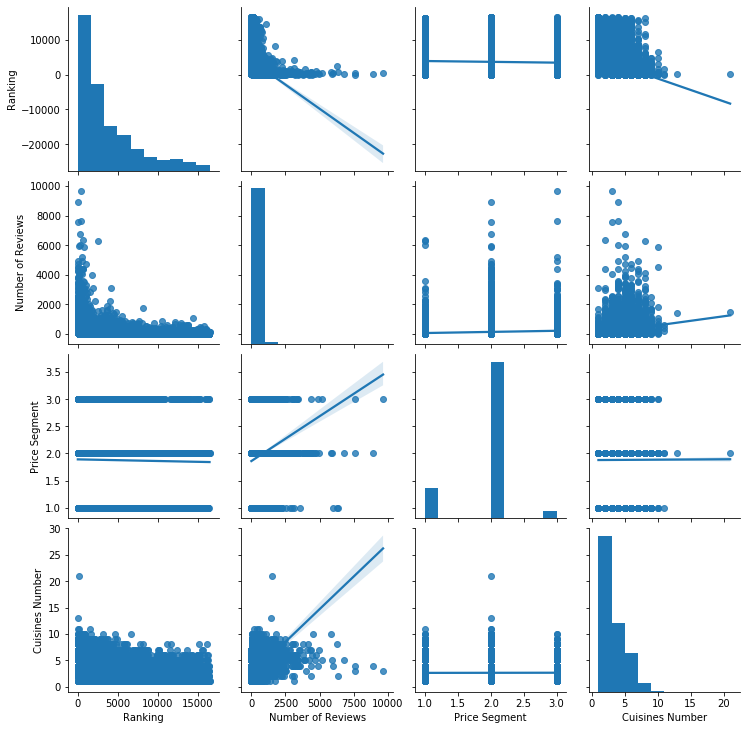

In [40]:
sns.pairplot(df, vars=['Ranking', 'Number of Reviews', 'Price Segment', 'Cuisines Number'], kind = 'reg')

# Разбиваем датафрейм на части, необходимые для обучения и тестирования модели

In [42]:
# Х - данные с информацией о ресторанах, у - целевая переменная (рейтинги ресторанов)
X = df.drop(['Restaurant_id', 'Rating', 'City', 'Cuisine Style', 'Price Range', 'Reviews', 'URL_TA', 'ID_TA', 'Reviews Dates', 'Country'], axis = 1)
y = df['Rating']

In [43]:
# Загружаем специальный инструмент для разбивки:
from sklearn.model_selection import train_test_split

In [44]:
# Наборы данных с меткой "train" будут использоваться для обучения модели, "test" - для тестирования.
# Для тестирования мы будем использовать 25% от исходного датасета.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

# Создаём, обучаем и тестируем модель

In [45]:
# Импортируем необходимые библиотеки:
from sklearn.ensemble import RandomForestRegressor # инструмент для создания и обучения модели
from sklearn import metrics # инструменты для оценки точности модели

In [46]:
# Создаём модель
regr = RandomForestRegressor(n_estimators=100)

# Обучаем модель на тестовом наборе данных
regr.fit(X_train, y_train)

# Используем обученную модель для предсказания рейтинга ресторанов в тестовой выборке.
# Предсказанные значения записываем в переменную y_pred
y_pred = regr.predict(X_test)

In [47]:
# Сравниваем предсказанные значения (y_pred) с реальными (y_test), и смотрим насколько они в среднем отличаются
# Метрика называется Mean Absolute Error (MAE) и показывает среднее отклонение предсказанных значений от фактических.
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))

MAE: 0.219558
